## Setup

In [37]:
from imports import *
from constants import *
from functions import *
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from pylab import *
from scipy.stats import hmean, norm
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.models import LinearColorMapper
from bokeh.models import HoverTool
import seaborn as sns

## Data visualization

In [31]:
my_df = readCSV(CLEAN_DATASET)

importando desde ./data/clean_tweet.csv


### Wordcloud

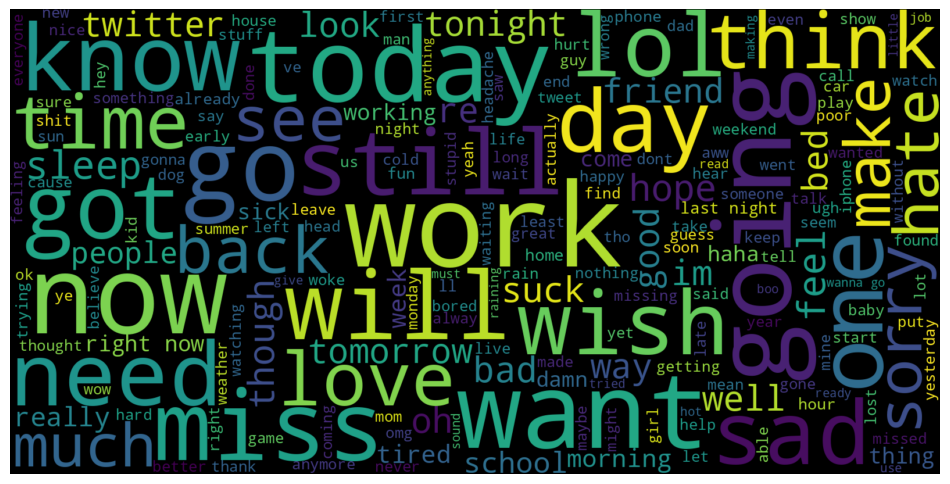

In [24]:
neg_tweets = my_df[my_df.target == 0]
neg_string = neg_tweets.text.tolist()
neg_string = pd.Series(neg_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [25]:
for t in neg_tweets.text[:200]:
    if 'love' in t:
        print(t)

ahh ive always wanted to see rent love the soundtrack
meh almost lover is the exception this track gets me depressed every time
awe love you too am here miss you
damn the grind is inspirational and saddening at the same time do not want you to stop cuz like what do much love
missing you babe but as long as your alive happy ya tired my love imma try to sleep hopefully you had headstart
love the french tell people here in the south qtr french and they snarl at me french are beautiful people


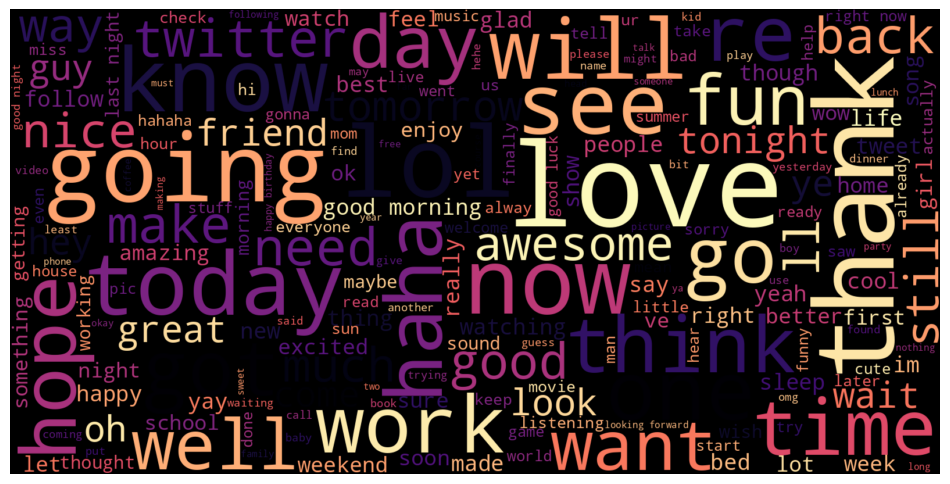

In [26]:
pos_tweets = my_df[my_df.target == 1]
pos_string = pos_tweets.text.tolist()
pos_string = pd.Series(pos_string).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(pos_string) 
plt.figure(figsize=(12,10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.show()

In [32]:
cvec = CountVectorizer()
cvec.fit(my_df.text)
neg_doc_matrix = cvec.transform(my_df[my_df.target == 0].text)
pos_doc_matrix = cvec.transform(my_df[my_df.target == 1].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names_out()).transpose()
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
saveDF(term_freq_df,TF_DATASET)

In [33]:

term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
to,313162,252567,565729
the,257836,265998,523834
my,190775,125955,316730
it,157448,147786,305234
and,153958,149642,303600
you,103844,198245,302089
not,194724,86865,281589
is,133432,111191,244623
in,115542,101160,216702
for,98999,117369,216368


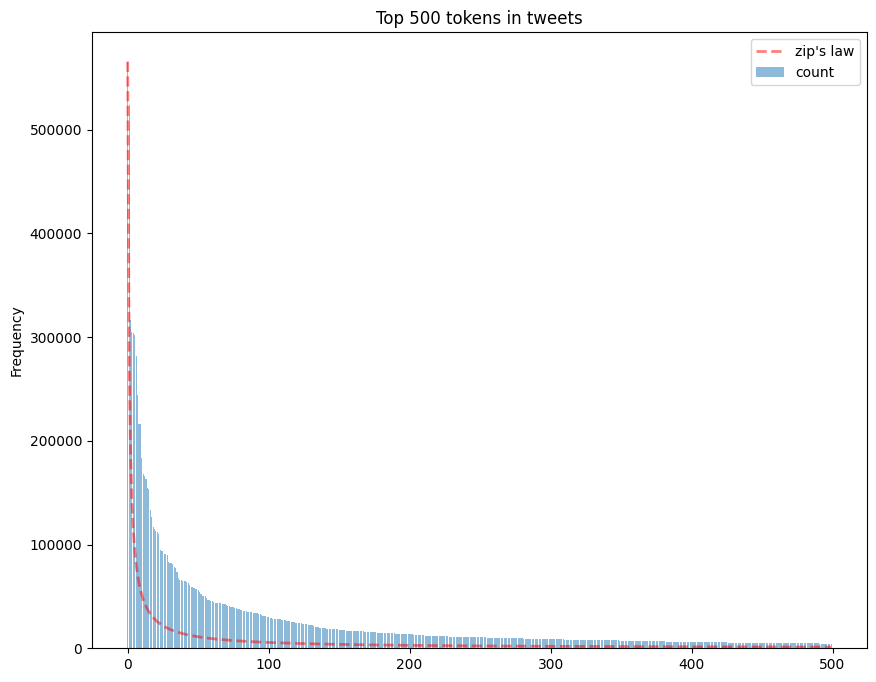

In [34]:
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df['total'].max()/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df['total'].nlargest(500), align='center', alpha=0.5, label='count')
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5, label = 'zip\'s law')
plt.legend()
plt.ylabel('Frequency')
plt.title('Top 500 tokens in tweets')
plt.show()

/tmp/ipykernel_6903/2511836580.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  frequencies = counts[indices]
/tmp/ipykernel_6903/2511836580.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
/tmp/ipykernel_6903/2511836580.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]],


<Figure size 640x480 with 0 Axes>

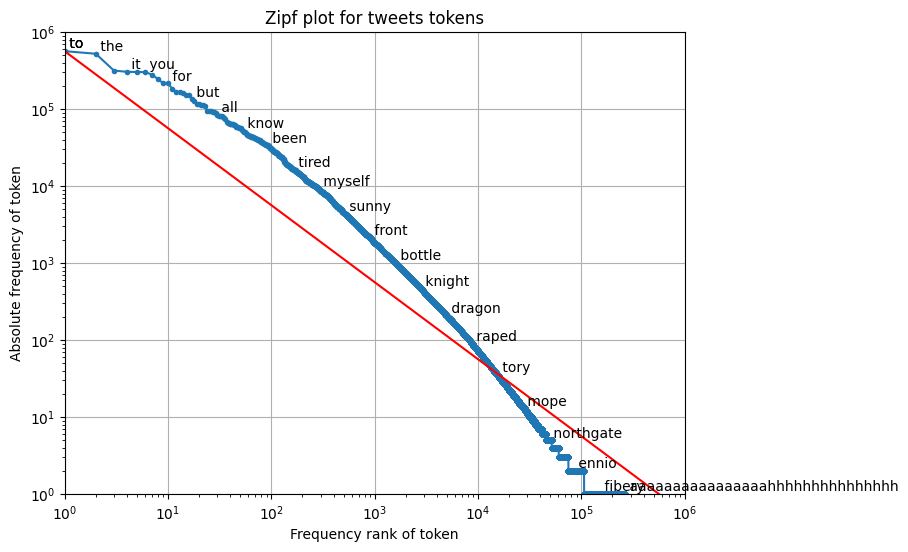

In [35]:

plt.clf()
counts = term_freq_df.total
tokens = counts.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)

frequencies = frequencies.astype(float)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")
plt.show()

In [36]:
cvec = CountVectorizer(stop_words='english', max_features=10000)
cvec.fit(my_df.text)
neg_doc_matrix = cvec.transform(my_df[my_df.target == 0].text)
pos_doc_matrix = cvec.transform(my_df[my_df.target == 1].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df2 = pd.DataFrame([neg,pos],columns=cvec.get_feature_names_out()).transpose()
term_freq_df2.columns = ['negative', 'positive']
term_freq_df2['total'] = term_freq_df2['negative'] + term_freq_df2['positive']
saveDF(term_freq_df2,TF_DATASET_NO_STOP_WORDS)

In [38]:
term_freq_df2 = readCSV(TF_DATASET_NO_STOP_WORDS)

importando desde ./data/term_freq_no_stop_words.csv


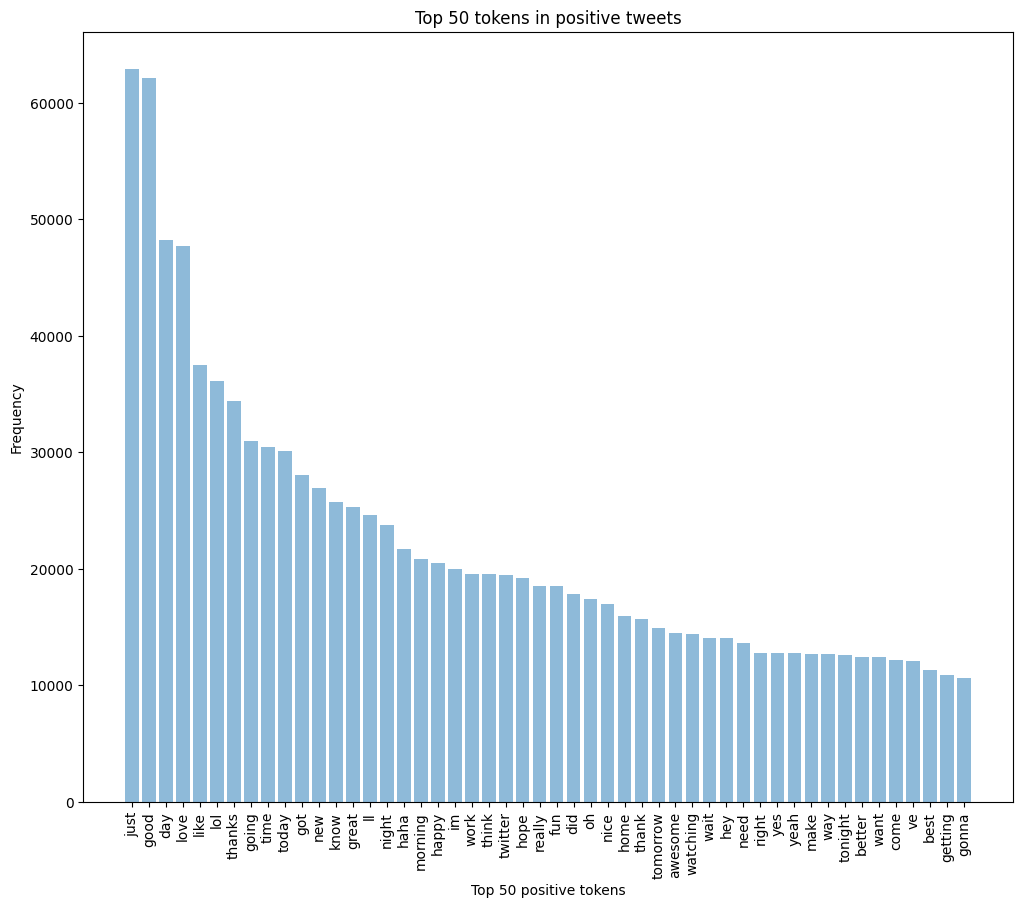

In [39]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive tweets')
plt.show()

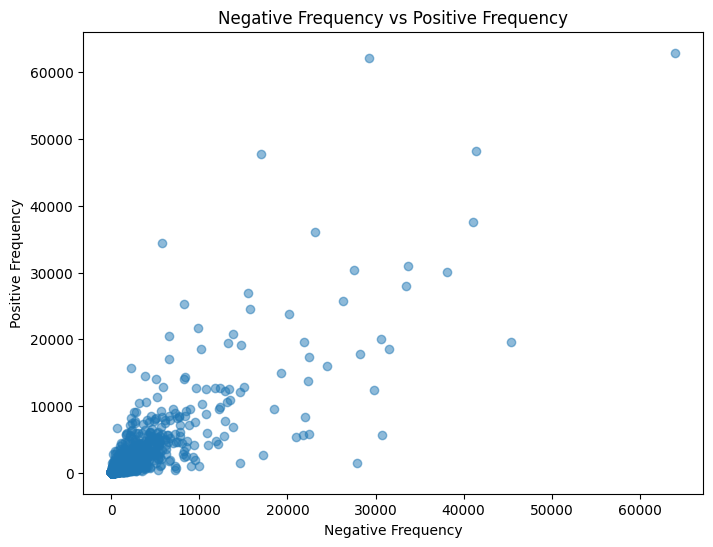

In [40]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="negative", y="positive",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')
plt.show()

In [41]:
term_freq_df2['pos_rate'] = term_freq_df2['positive'] * 1./term_freq_df2['total']
term_freq_df2.sort_values(by='pos_rate', ascending=False).iloc[:10]

,negative,positive,total,pos_rate
mileymonday,0,161,161,1.000000
emailunlimited,0,100,100,1.000000
dividends,0,83,83,1.000000
shareholder,1,80,81,0.987654
fuzzball,2,99,101,0.980198
recommends,3,109,112,0.973214
delongeday,6,162,168,0.964286
atcha,3,80,83,0.963855
timestamp,3,68,71,0.957746
shaundiviney,4,89,93,0.956989


In [42]:
term_freq_df2['pos_freq_pct'] = term_freq_df2['positive'] * 1./term_freq_df2['positive'].sum()
term_freq_df2.sort_values(by='pos_freq_pct', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct
just,64004,62944,126948,0.495825,0.014396
good,29209,62118,91327,0.680171,0.014207
day,41374,48186,89560,0.538030,0.011020
love,16990,47694,64684,0.737338,0.010908
like,41050,37520,78570,0.477536,0.008581
lol,23123,36118,59241,0.609679,0.008260
thanks,5768,34375,40143,0.856314,0.007862
going,33689,30939,64628,0.478724,0.007076
time,27526,30432,57958,0.525070,0.006960
today,38116,30100,68216,0.441245,0.006884


In [43]:
term_freq_df2['pos_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['pos_rate'], x['pos_freq_pct']]) if x['pos_rate'] > 0 and x['pos_freq_pct'] > 0 else 0), axis=1)
                                                       
term_freq_df2.sort_values(by='pos_hmean', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean
just,64004,62944,126948,0.495825,0.014396,0.027979
good,29209,62118,91327,0.680171,0.014207,0.027832
day,41374,48186,89560,0.538030,0.011020,0.021598
love,16990,47694,64684,0.737338,0.010908,0.021498
like,41050,37520,78570,0.477536,0.008581,0.016859
lol,23123,36118,59241,0.609679,0.008260,0.016300
thanks,5768,34375,40143,0.856314,0.007862,0.015580
going,33689,30939,64628,0.478724,0.007076,0.013946
time,27526,30432,57958,0.525070,0.006960,0.013738
today,38116,30100,68216,0.441245,0.006884,0.013557


In [44]:
def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())
term_freq_df2['pos_rate_normcdf'] = normcdf(term_freq_df2['pos_rate'])
term_freq_df2['pos_freq_pct_normcdf'] = normcdf(term_freq_df2['pos_freq_pct'])
term_freq_df2['pos_normcdf_hmean'] = hmean([term_freq_df2['pos_rate_normcdf'], term_freq_df2['pos_freq_pct_normcdf']])
term_freq_df2.sort_values(by='pos_normcdf_hmean',ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean
welcome,620,6702,7322,0.915324,0.001533,0.003060,0.995631,0.999369,0.997497
thank,2282,15736,18018,0.873349,0.003599,0.007168,0.990801,1.000000,0.995379
thanks,5768,34375,40143,0.856314,0.007862,0.015580,0.987780,1.000000,0.993853
awesome,3821,14469,18290,0.791088,0.003309,0.006591,0.967042,1.000000,0.983245
glad,2273,8255,10528,0.784100,0.001888,0.003767,0.963668,0.999971,0.981484
follow,2552,9154,11706,0.781992,0.002094,0.004176,0.962597,0.999996,0.980940
enjoy,1642,5876,7518,0.781591,0.001344,0.002683,0.962390,0.997441,0.979602
sweet,1610,5646,7256,0.778115,0.001291,0.002578,0.960559,0.996331,0.978118
yay,3165,10501,13666,0.768403,0.002402,0.004788,0.955057,1.000000,0.977012
hello,1122,4524,5646,0.801275,0.001035,0.002067,0.971493,0.982293,0.976863


In [45]:
term_freq_df2['neg_rate'] = term_freq_df2['negative'] * 1./term_freq_df2['total']
term_freq_df2['neg_freq_pct'] = term_freq_df2['negative'] * 1./term_freq_df2['negative'].sum()
term_freq_df2['neg_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['neg_rate'], x['neg_freq_pct']])                                                                if x['neg_rate'] > 0 and x['neg_freq_pct'] > 0                                                                else 0), axis=1)
                                                       
term_freq_df2['neg_rate_normcdf'] = normcdf(term_freq_df2['neg_rate'])
term_freq_df2['neg_freq_pct_normcdf'] = normcdf(term_freq_df2['neg_freq_pct'])
term_freq_df2['neg_normcdf_hmean'] = hmean([term_freq_df2['neg_rate_normcdf'], term_freq_df2['neg_freq_pct_normcdf']])
saveDF(term_freq_df2,TF_DATASET_NO_STOP_WORDS_WITH_DISTRIBUTIONS)
term_freq_df2.sort_values(by='neg_normcdf_hmean', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean,neg_rate,neg_freq_pct,neg_hmean,neg_rate_normcdf,neg_freq_pct_normcdf,neg_normcdf_hmean
sad,27911,1510,29421,0.051324,0.000345,0.000686,0.002370,0.709589,0.004725,0.948676,0.006096,0.012114,0.997630,1.000000,0.998813
hurts,7204,456,7660,0.059530,0.000104,0.000208,0.002782,0.503851,0.005533,0.940470,0.001573,0.003142,0.997218,0.999742,0.998479
sick,14617,1419,16036,0.088488,0.000325,0.000647,0.004800,0.693341,0.009535,0.911512,0.003192,0.006363,0.995200,1.000000,0.997594
sucks,9902,982,10884,0.090224,0.000225,0.000448,0.004955,0.610416,0.009830,0.909776,0.002163,0.004315,0.995045,0.999999,0.997516
poor,7333,719,8052,0.089295,0.000164,0.000328,0.004872,0.557656,0.009659,0.910705,0.001602,0.003198,0.995128,0.999799,0.997458
ugh,9056,998,10054,0.099264,0.000228,0.000455,0.005835,0.613572,0.011560,0.900736,0.001978,0.003947,0.994165,0.999995,0.997072
missing,7282,991,8273,0.119787,0.000227,0.000452,0.008365,0.612192,0.016504,0.880213,0.001590,0.003175,0.991635,0.999778,0.995690
headache,5317,421,5738,0.073371,0.000096,0.000192,0.003624,0.496664,0.007196,0.926629,0.001161,0.002320,0.996376,0.993811,0.995091
hate,17207,2614,19821,0.131880,0.000598,0.001190,0.010269,0.868739,0.020298,0.868120,0.003758,0.007484,0.989731,1.000000,0.994839
miss,30713,5676,36389,0.155981,0.001298,0.002575,0.015215,0.996497,0.029972,0.844019,0.006708,0.013310,0.984785,1.000000,0.992334


<Figure size 640x480 with 0 Axes>

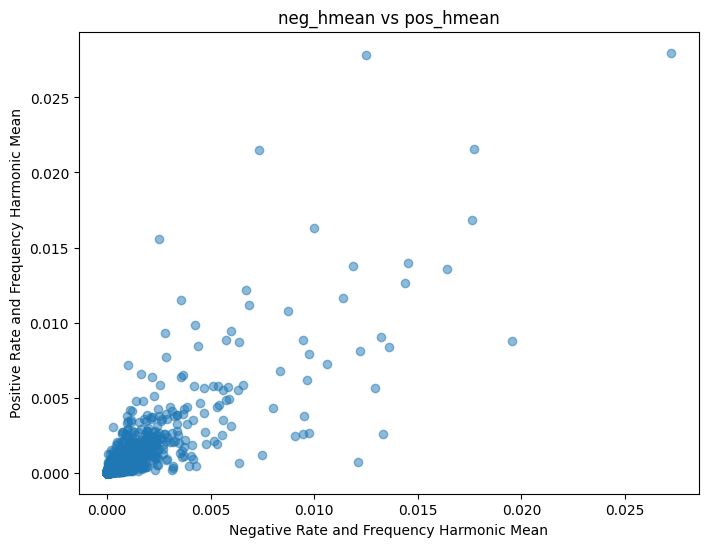

In [46]:
plt.clf()
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_hmean", y="pos_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Rate and Frequency Harmonic Mean')
plt.xlabel('Negative Rate and Frequency Harmonic Mean')
plt.title('neg_hmean vs pos_hmean')
plt.show()

<Figure size 640x480 with 0 Axes>

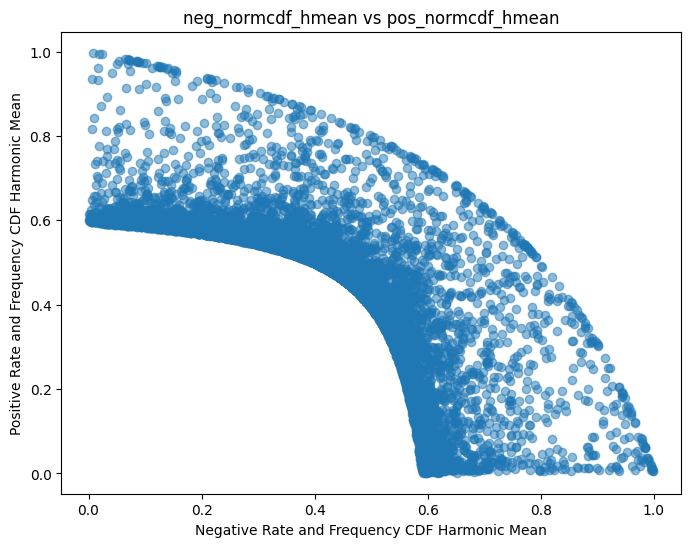

In [47]:
plt.clf()
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_normcdf_hmean", y="pos_normcdf_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Rate and Frequency CDF Harmonic Mean')
plt.xlabel('Negative Rate and Frequency CDF Harmonic Mean')
plt.title('neg_normcdf_hmean vs pos_normcdf_hmean')
plt.show()

In [48]:
output_notebook()
color_mapper = LinearColorMapper(palette='Inferno256', low=min(term_freq_df2.pos_normcdf_hmean), high=max(term_freq_df2.pos_normcdf_hmean))
p = figure(x_axis_label='neg_normcdf_hmean', y_axis_label='pos_normcdf_hmean')
p.circle('neg_normcdf_hmean','pos_normcdf_hmean',size=5,alpha=0.3,source=term_freq_df2,color={'field': 'pos_normcdf_hmean', 'transform': color_mapper})
hover = HoverTool(tooltips=[('token','@index')])
p.add_tools(hover)
show(p)

Loading BokehJS ...